# 🧠 Task 8: Clustering with K-Means (Unsupervised Learning)

 ## 📌 Objective:
 Perform unsupervised learning using K-Means to identify customer segments from mall customer data.

## 🔧 Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## 📥 Step 2: Load and Preview Dataset

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 🧹 Step 3: Data Preprocessing

In [4]:
# Drop CustomerID and rename categorical gender to numeric
df_clean = df.drop('CustomerID', axis=1)
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})
df_clean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## 📊 Step 4: Normalize the Features

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

## 📉 Step 5: Elbow Method to Determine Optimal K

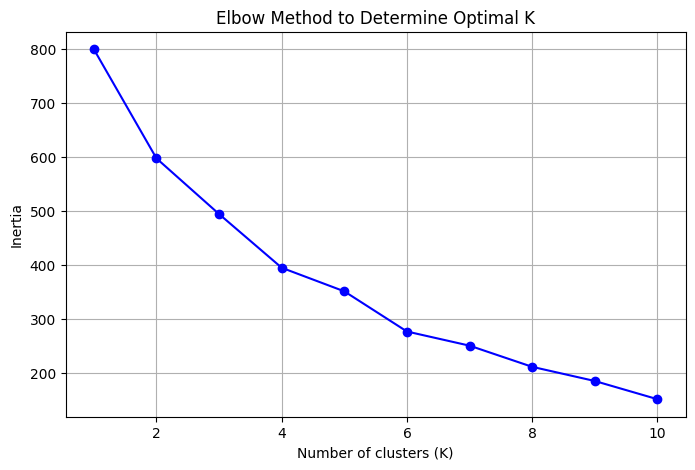

In [6]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()

## 🔍 Step 6: Fit KMeans with Optimal K (let's choose K=5)

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

## 🧭 Step 7: Evaluate Clustering with Silhouette Score

In [8]:
score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", round(score, 3))

Silhouette Score: 0.272


## 🎯 Step 8: Visualize Clusters (Using PCA for 2D Projection)

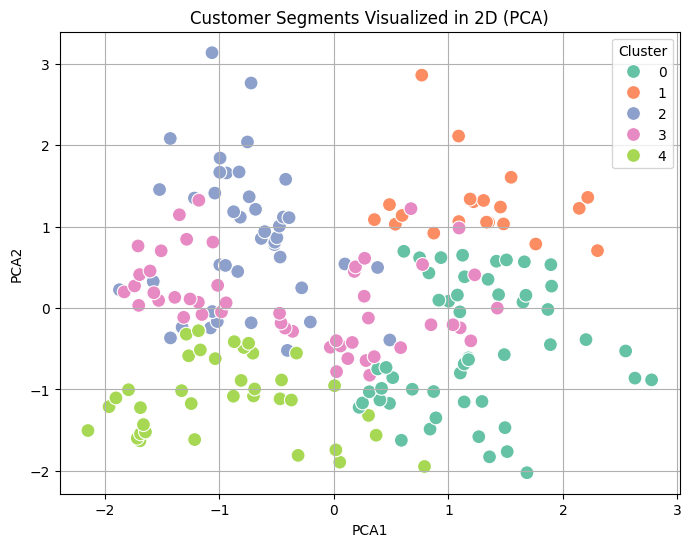

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df, s=100)
plt.title("Customer Segments Visualized in 2D (PCA)")
plt.grid(True)
plt.show()

## ✅ Conclusions
- Optimal K (number of clusters): 5, confirmed using the Elbow Method.

- Silhouette Score of 0.272 suggests moderate clustering:

  -  Some clusters are well-separated.

  - A few points lie close to decision boundaries, showing overlap.

- PCA visualization supports this by showing distinct but not perfectly clean boundaries.

- This clustering can help businesses:

  - Target different customer groups (e.g., high spenders vs. low spenders)

  - Personalize marketing based on cluster behavior.